<a href="https://colab.research.google.com/github/ogola89/Bio-Inspired-AI-Algorithms/blob/main/Artificial_intelligence_bioinspired_alg_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial bioinspired algorithms - Differential Evolution - Nutrient alocation


Solution/nutrient combination

In [ ]:
import random
import matplotlib.pyplot as plt

CR = 0.5
F = 0.8

def combination():
  items = []
  for i in range(5):
    quant = random.randint(0,199) + random.random()
    items.append(quant)
  return items



In [ ]:
combination()


[169.8773930617424,
 181.92912211335562,
 90.64993680920395,
 102.40846411294059,
 151.86958103667868]

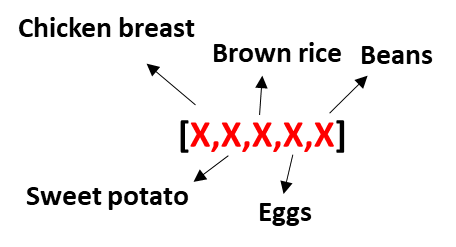

Population of solutions

In [ ]:
def population(num):
  pop = []
  for i in range(num):
    pop.append(combination())
  return pop


In [ ]:
pop = population(5)

for i in pop:
  print(i)



[174.0619792138792, 142.62419975992992, 128.73506084515407, 33.50892702587886, 124.67845879997839]
[51.333635273455364, 104.73481931936469, 60.643278897988075, 33.927240602528684, 94.01094677358745]
[77.21511351655418, 144.33700860363135, 19.89232634994997, 78.44762652597281, 77.34845545269417]
[23.21625160398139, 126.34055346583015, 63.2761494490876, 70.97596321247572, 67.28765177857382]
[75.50456974543175, 86.30001523396687, 105.08713382850334, 168.42763983469354, 158.9874825583598]


Objective/fitness function

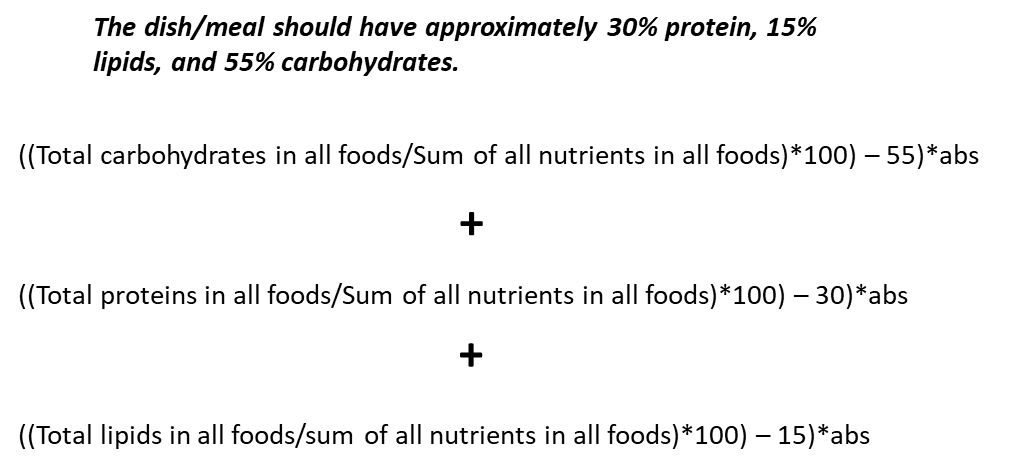

In [ ]:
def divergence(dish,show=True):
  carbs = dish[0]*0.05 + dish[1]*0.24 + dish[2]*0.26 + dish[3]*0.015 + dish[4]*0.29
  prots = dish[0]*0.23 + dish[1]*0.02 + dish[2]*0.026 + dish[3]*0.13 + dish[4]*0.095
  lips = dish[0]*0.05 + dish[1]*0 + dish[2]*0.01 + dish[3]*0.089 + dish[4]*0.14

  total = carbs + lips + prots
  summ = sum(dish)

  porcCarb = (carbs/total)*100
  porcProt = (prots/total)*100
  porcLip = (lips/total)*100

  difCarb = abs(porcCarb-55)
  difProt = abs(porcProt-30)
  difLip = abs(porcLip-15)

  if show:
    print(f'Carbs: {porcCarb}')
    print(f'Lips: {porcProt}')
    print(f'Prots: {porcLip}')
    print(f'Total of grams: {summ}g')
  
  totalDif = difCarb + difLip + difProt
  return totalDif


In [ ]:
x = combination()

print(x)
print(divergence(x,show=True))




[95.7003770727219, 23.158220980828315, 87.07547068096092, 185.58878159541345, 162.0536482420981]
Carbs: 43.131596737779546
Lips: 33.48916013683094
Prots: 23.37924312538952
Total of grams: 553.5764985720227g
23.736806524440915


Selection of three vectors

In [ ]:
def select3(parental,population):
  p2 = []
  three_vectors = []
  for v in population:
    if parental != v:
      p2.append(v)
  for j in range(3):
    rand = random.choice(p2)
    three_vectors.append(rand)
    p2.remove(rand)
  return three_vectors




In [ ]:
pop = [[1,7,3],[4,4,4],[5,2,1],[0,0,0],[7,8,9]]
three = select3(pop[0],pop)

print(pop)
print(pop[0])
print(three)








[[1, 7, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]
[1, 7, 3]
[[7, 8, 9], [4, 4, 4], [5, 2, 1]]


Mutation/crossover

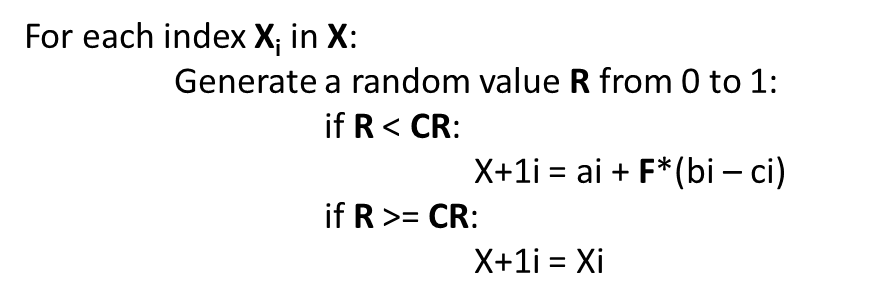

In [ ]:
def mutation(parentalVector,three):
  count = 0
  A = three[0]
  B = three[1]
  C = three[2]

  trial = []

  while count < len(parentalVector):
    R = random.random()
    if R < CR:
      X = A[count] + F*abs(B[count]-C[count])
      trial.append(X)
    else:
      trial.append(parentalVector[count])
    count += 1
  return trial



In [ ]:
pop = [[1, 7, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]
parental = pop[0]
m = mutation(parental,select3(parental,pop))

print(parental)
print(m)
print(pop)




Best vector

In [ ]:
def bestVector(pop):
  scores = []
  for i in pop:
    scores.append(divergence(i))
  indice = scores.index(min(scores))
  return pop[indice]




In [ ]:
pop1 = population(10)
bestV = bestVector(pop1)

print(pop1)
print(bestV)
print(divergence(bestV))








[[16.044869556316648, 147.83267963071873, 6.081968852130658, 91.14317381672417, 186.78463493393517], [134.11147181336213, 176.84708518048376, 128.37488038701684, 178.55386178480126, 108.88219372140749], [105.13819898368598, 139.74606401787395, 90.8580670115185, 168.6702113057291, 184.16713872263537], [172.34560569945822, 98.0399341917649, 115.36782776235552, 125.58474067812615, 116.06636820729285], [37.3043999983413, 56.61170987418167, 131.19148669595305, 186.50574945542408, 10.661497644187927], [173.57092281780174, 128.28889170303722, 196.200992356987, 92.41579103059287, 51.442192118739285], [64.04137678877643, 51.510994200494636, 106.8537282531293, 52.93154376354013, 190.7970613384991], [157.7873645257237, 171.4466016532629, 147.66026627052716, 163.08525049177723, 16.21811884330319], [174.04816417174084, 173.95383530290712, 44.850692656980804, 187.58802046310845, 131.13393760924097], [119.23717817737695, 122.37673917620249, 101.55034263443508, 25.943857470063108, 89.31020295760506]]


Algorithm

In [ ]:
popul = population(5)
bests = []

for i in range(150):
  for j in popul:
    tri = select3(j,popul) 
    trial = mutation(j,tri)
    if divergence(trial) < divergence(j):
      popul.remove(j)
      popul.append(trial)
  print(f'Best vector {bestVector(popul)}')
  print(f'Fitness value: {divergence(bestVector(popul))}')
  bests.append(divergence(bestVector(popul)))
  print()

plt.plot(bests)
plt.xlabel('Iterations')
plt.ylabel('Fitness value')
plt.title('Divergence values')
plt.show()



In [ ]:
divergence([38.17914215025426, 19.177136865465904, 274.78521768501264, 257.12827590436353, 80.05218735225124],show=True)